<a href="https://colab.research.google.com/github/Sai-Krishna-13/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/HotelBookings.csv')

**To know the number of rows and columns in our data set**


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [ ]:
list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## **Checking and handling missing values from the data set**

In [ ]:
df.isnull().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

In [ ]:
#Replacing missing values with 0 and Unknown
df[['company','agent','children']] = df[['company','agent','children']].fillna(0)
df['country'].fillna('Unknown', inplace = True)

In [ ]:
#Removing all the entries where there are no guests
no_guests = list(df[(df.adults + df.babies + df.children)==0].index)
df.drop(df.index[no_guests], inplace = True)
df.shape

(119210, 32)

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

## **Exploratory Data Analysis**

In [ ]:
from datetime import datetime 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# **1. Meals - Variation in hotels and customer types**


#    1.1 Meals - Variation in hotels

In [ ]:
meals_types = df.meal.value_counts()
meals_types

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

Text(0.5, 0, 'Meal type')

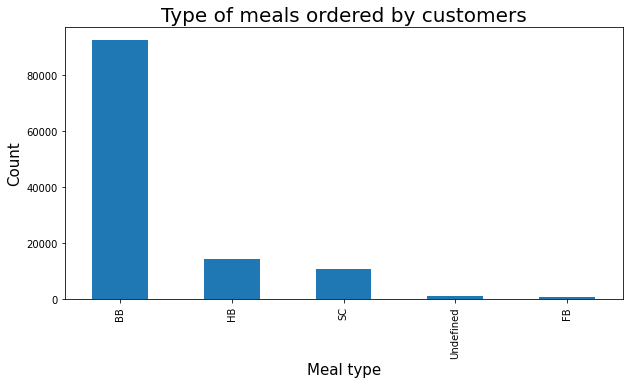

In [ ]:
plt.figure(figsize=(10,5))
meals_types.plot(kind='bar')
plt.title('Type of meals ordered by customers',fontsize=20)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Meal type',fontsize=15)

In [ ]:
hotel_meal_relation = df.groupby("hotel")["meal"].value_counts()
hotel_meal_relation

hotel         meal     
City Hotel    BB           62233
              SC           10474
              HB            6412
              FB              44
Resort Hotel  BB           30003
              HB            8046
              Undefined     1169
              FB             754
              SC              75
Name: meal, dtype: int64

Text(0.5, 0, 'Hotel-Meal')

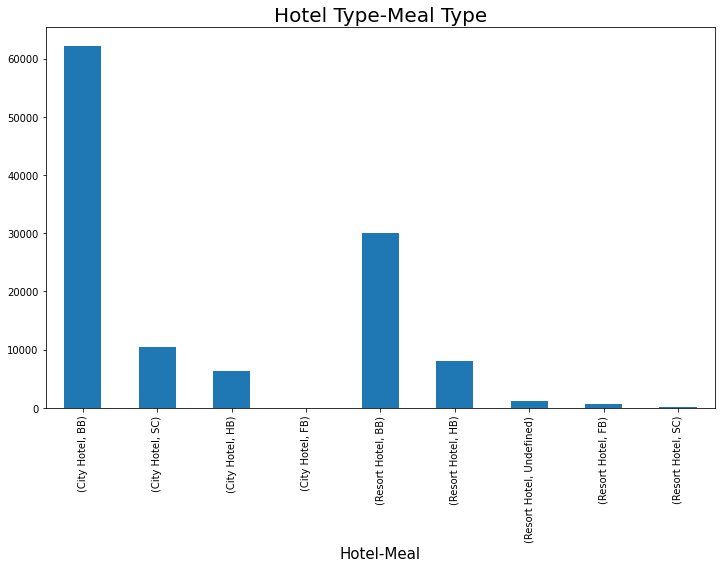

In [ ]:
plt.figure(figsize=(12,7))
hotel_meal_relation.plot(kind='bar')
plt.title("Hotel Type-Meal Type",fontsize=20)
plt.xlabel("Hotel-Meal",fontsize=15)

Text(0.5, 1.0, 'City hotel')

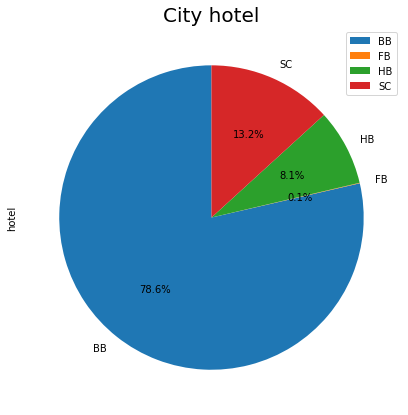

In [ ]:
city_hotel = df[df['hotel']=='City Hotel']
city_hotel_meal_relation = city_hotel.groupby("meal").count()
city_hotel_meal_relation.plot(kind='pie', y = "hotel",autopct='%1.1f%%',startangle=90,figsize=(10,7))
plt.title("City hotel",fontsize=20)

Text(0.5, 1.0, 'Resort hotel')

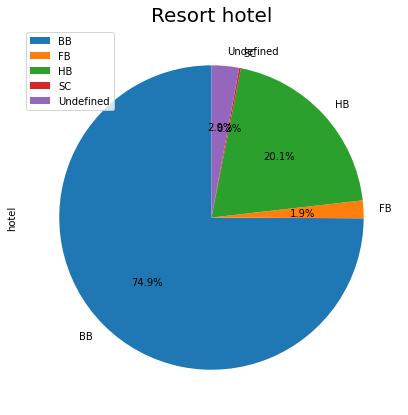

In [ ]:
resort_hotel = df[df['hotel']=='Resort Hotel']
resort_hotel_meal_relation = resort_hotel.groupby("meal").count()
resort_hotel_meal_relation.plot(kind='pie', y = "hotel",autopct='%1.1f%%',startangle=90,figsize=(10,7))
plt.title("Resort hotel",fontsize=20)

Conclusion - Most of the guests prefer Bed and Breakfast(BB) meal type and after that guests prefer Half board(HB).Very few prefer to take Full board(FB).

# 1.2 Meals - Type of customers

In [ ]:
customertype_meal = df.groupby(["customer_type"])["meal"].value_counts()
customertype_meal

customer_type    meal     
Contract         BB            3256
                 HB             613
                 SC             183
                 Undefined       15
                 FB               5
Group            BB             499
                 HB              36
                 SC              36
                 Undefined        2
                 FB               1
Transient        BB           70632
                 SC            9892
                 HB            8019
                 FB             547
                 Undefined      386
Transient-Party  BB           17849
                 HB            5790
                 Undefined      766
                 SC             438
                 FB             245
Name: meal, dtype: int64

Text(0.5, 0, 'Customer Type')

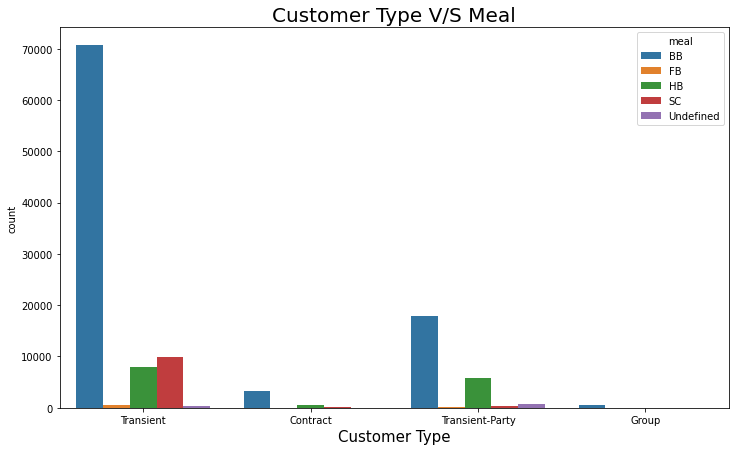

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x='customer_type',hue='meal')
plt.title("Customer Type V/S Meal",fontsize=20)
plt.xlabel("Customer Type",fontsize=15)

Conclusion - Every type of customer prefer BB type of meal compared to others. Typically, in transient type customer prefer no meal package than HB. 

# **2. Deposits - Deposit Type & variaiton by type of customers**

# 2.1 Deposits - Deposit Type

In [ ]:
deposit_types = df.deposit_type.value_counts()
deposit_types

No Deposit    104461
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

Text(0.5, 0, 'Deposit type')

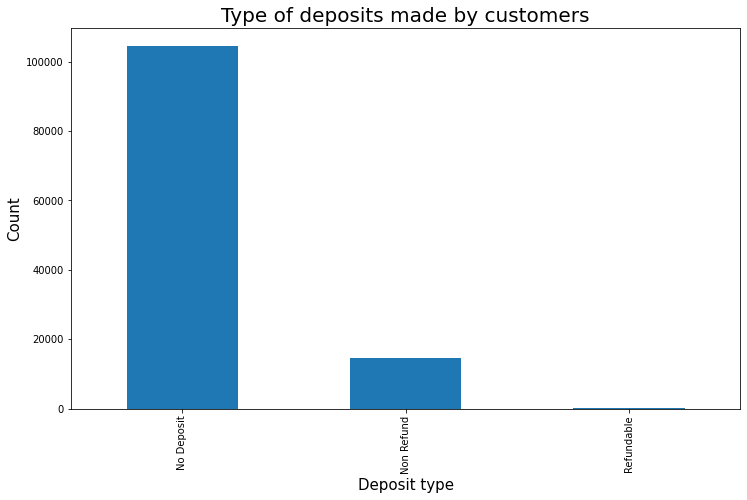

In [ ]:
plt.figure(figsize=(12,7))
deposit_types.plot(kind='bar')
plt.title('Type of deposits made by customers',fontsize=20)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Deposit type',fontsize=15)

Conclusion - Most customers prefer to book a no deposit compared to Non Refund and Refundable. But comparing Non Refund and Refundable, customer preferred Non Refund.

# 2.2 Deposits - Variation by type of customers

In [ ]:
deposittype_customertype_relation = df.groupby(["deposit_type"])["customer_type"].value_counts()
deposittype_customertype_relation

deposit_type  customer_type  
No Deposit    Transient          76547
              Transient-Party    23822
              Contract            3526
              Group                566
Non Refund    Transient          12909
              Transient-Party     1134
              Contract             544
Refundable    Transient-Party      132
              Transient             20
              Group                  8
              Contract               2
Name: customer_type, dtype: int64

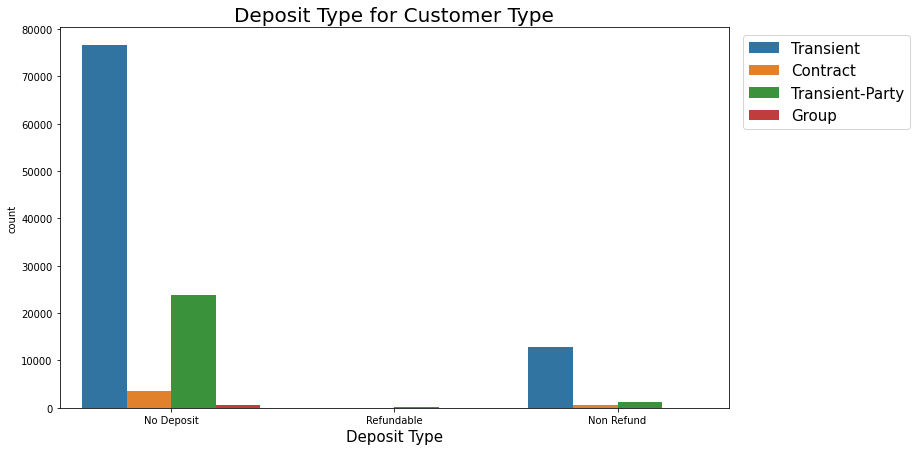

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x='deposit_type',hue='customer_type')
plt.title('Deposit Type for Customer Type',fontsize=20)
plt.xlabel('Deposit Type',fontsize=15)
plt.legend(bbox_to_anchor=(1.01, 1),fontsize=15)

Conclusion - Most customer type prefer booking no deposit type. Very less customers booked refundable one. There are no group type customers booked Non-Refund deposit type.

# **3. Booking Changes - v/s Lead Time & WRT Customer type**


# 3.1 Booking Changes 

In [ ]:
number_of_changes = df.booking_changes.value_counts()
number_of_changes

0     101232
1      12666
2       3780
3        914
4        367
5        115
6         61
7         29
8         14
9          8
10         6
13         5
14         3
15         3
17         2
16         2
11         1
12         1
18         1
Name: booking_changes, dtype: int64

Text(0.5, 0, 'No of changes')

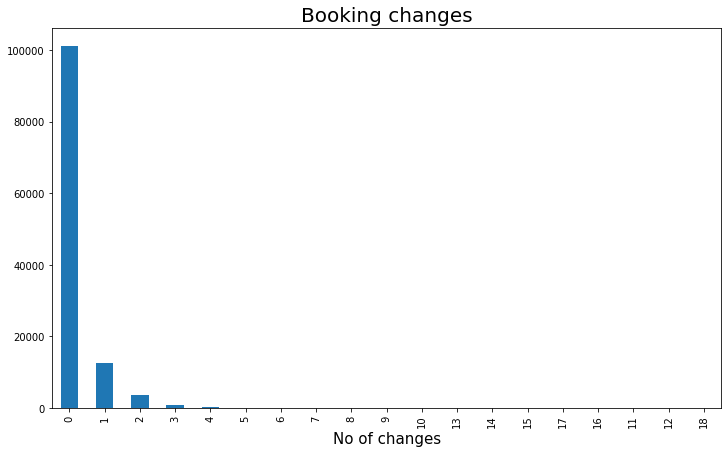

In [ ]:
plt.figure(figsize=(12,7))
number_of_changes.plot(kind='bar')
plt.title("Booking changes",fontsize=20)
plt.xlabel("No of changes",fontsize=15)

Conclusion - Most bookings has no changes and a few has single or double changes. More than 2 changes are done for very very few bookings.

# 3.2 Booking Changes V/S Lead Time

In [ ]:
changes_leadtime_relation = df.groupby(["lead_time"])["booking_changes"].value_counts()
changes_leadtime_relation

lead_time  booking_changes
0          0                  5092
           1                   908
           2                   189
           3                    58
           4                    10
                              ... 
622        0                    17
626        0                    30
629        0                    17
709        2                     1
737        4                     1
Name: booking_changes, Length: 1881, dtype: int64

Text(0, 0.5, 'Lead Time')

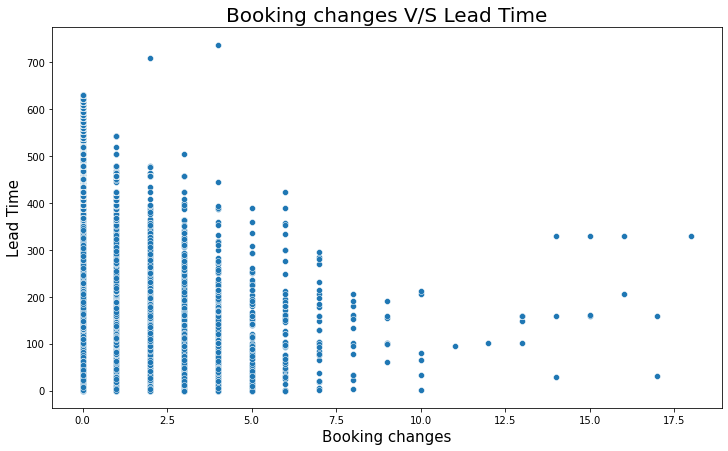

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='booking_changes',data=df,y='lead_time')
plt.title("Booking changes V/S Lead Time",fontsize=20)
plt.xlabel("Booking changes",fontsize=15)
plt.ylabel("Lead Time",fontsize=15)

Conclusion - lead Time has an impact on booking changes. We can see upto 7 changes are done in dense bookings with lead time upto 200 days. After that very very few bookings has changes. 

# 3.3 Booking Changes - WRT Customer Type

In [ ]:
customertype_changesmade = df.groupby(["customer_type"])["booking_changes"].value_counts()
customertype_changesmade

customer_type    booking_changes
Contract         0                   3670
                 1                    343
                 2                     41
                 3                     13
                 4                      3
                 5                      1
                 7                      1
Group            0                    463
                 1                     74
                 2                     31
                 3                      5
                 4                      1
Transient        0                  78048
                 1                   7936
                 2                   2547
                 3                    569
                 4                    229
                 5                     69
                 6                     37
                 7                     15
                 8                      8
                 9                      4
                 13                     4
 

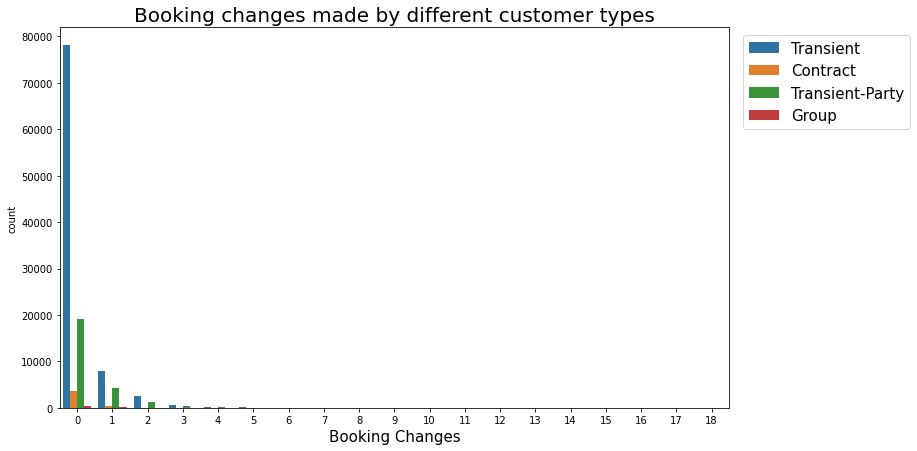

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x='booking_changes',hue='customer_type')
plt.title("Booking changes made by different customer types",fontsize=20)
plt.xlabel("Booking Changes",fontsize=15)
plt.legend(bbox_to_anchor=(1.01, 1),fontsize=15)

Conclusion - Transient type or transient-party type has done booking changes when compared to others. 

# **4. Repeating guests - WRT Hotel & Customer Type**

# 4.1 Repeated Guests - WRT Hotel

In [ ]:
repeatedguest_cityhotel = city_hotel.groupby(["hotel"])["is_repeated_guest"].value_counts()
repeatedguest_cityhotel

hotel       is_repeated_guest
City Hotel  0                    77186
            1                     1977
Name: is_repeated_guest, dtype: int64

Text(0.5, 1.0, 'Percentage of repeated/non-repeated cutomers for City Hotel')

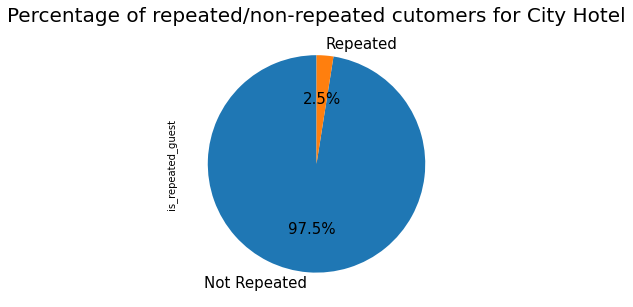

In [ ]:
repeatedguest_cityhotel.plot(kind = 'pie',startangle=90,figsize=(5,5),autopct='%1.1f%%',labels=['Not Repeated','Repeated'],fontsize=15)
plt.title("Percentage of repeated/non-repeated cutomers for City Hotel",fontsize=20)

Conclusion - 97.5% guests are not repeadted for City Hotel.

In [ ]:
repeatedguest_resorthotel = resort_hotel.groupby(["hotel"])["is_repeated_guest"].value_counts()
repeatedguest_resorthotel

hotel         is_repeated_guest
Resort Hotel  0                    38269
              1                     1778
Name: is_repeated_guest, dtype: int64

Text(0.5, 1.0, 'Percentage of repeated/non-repeated cutomers for Resort Hotel')

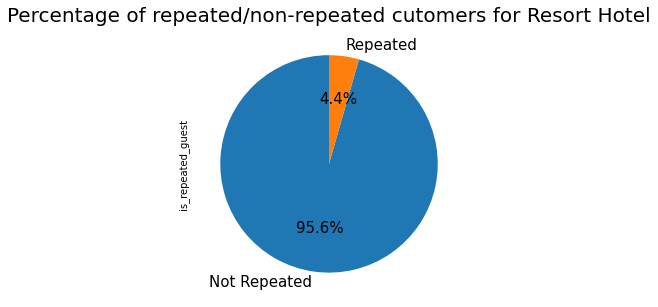

In [ ]:
repeatedguest_resorthotel.plot(kind = 'pie',startangle=90,figsize=(5,5),autopct='%1.1f%%',labels=['Not Repeated','Repeated'],fontsize=15)
plt.title("Percentage of repeated/non-repeated cutomers for Resort Hotel",fontsize=20)

Conclusion - 95.6% guests are not repeated for Resort Hotel.

# 4.2 Repeated Guests - Customer Type

In [ ]:
repeatedguest_customertype = df.groupby(["customer_type"])["is_repeated_guest"].value_counts()
repeatedguest_customertype

customer_type    is_repeated_guest
Contract         0                     4041
                 1                       31
Group            0                      413
                 1                      161
Transient        0                    86455
                 1                     3021
Transient-Party  0                    24546
                 1                      542
Name: is_repeated_guest, dtype: int64

Text(0.5, 0, 'Customer Type')

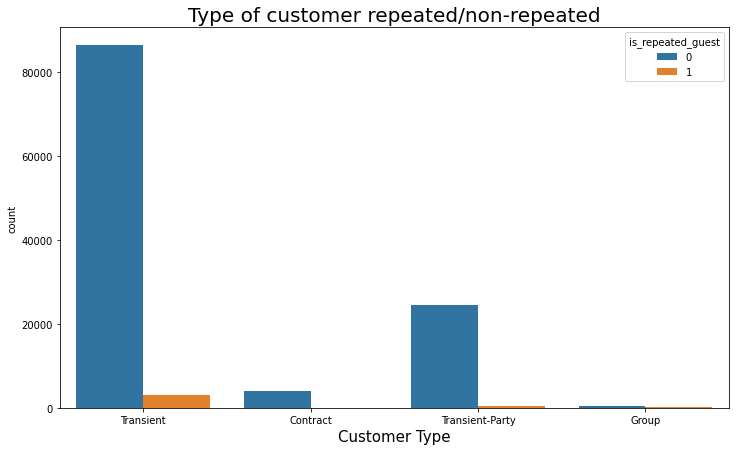

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x='customer_type',hue='is_repeated_guest')
plt.title("Type of customer repeated/non-repeated",fontsize=20)
plt.xlabel("Customer Type",fontsize = 15)

Conclusion - Most of the guests are not repeating. In transient and transient-party few guests were repeated.

# **5. Waiting Days -  WRT Customer Type, WRT Deposit type, WRT Market Segment, WRT Distribution channels.**
                   

In [ ]:
df.days_in_waiting_list.unique()

array([  0,  50,  47,  65, 122,  75, 101, 150, 125,  14,  60,  34, 100,
        22, 121,  61,  39,   5,   1,   8, 107,  43,  52,   2,  11, 142,
       116,  13,  44,  97,  83,   4, 113,  18,  20, 185,  93, 109,   6,
        37, 105, 154,  64,  99,  38,  48,  33,  77,  21,  80,  59,  40,
        58,  89,  53,  49,  69,  87,  91,  57, 111,  79,  98,  85,  63,
        15,   3,  41, 224,  31,  56, 187, 176,  71,  55,  96, 236, 259,
       207, 215, 160, 120,  30,  32,  27,  62,  24, 108, 147, 379,  70,
        35, 178, 330, 223, 174, 162, 391,  68, 193,  10,  76,  16,  28,
         9, 165,  17,  25,  46,   7,  84, 175, 183,  23, 117,  12,  54,
        26,  73,  45,  19,  42,  72,  81,  74, 167,  36])

# 5.1 Waiting Days - WRT Customer Type

In [ ]:
waiting_customertype_relation = df.groupby(["days_in_waiting_list"])["customer_type"].value_counts()
waiting_customertype_relation

days_in_waiting_list  customer_type  
0                     Transient          87572
                      Transient-Party    23474
                      Contract            4072
                      Group                574
1                     Transient-Party        7
                                         ...  
259                   Transient-Party       10
330                   Transient-Party       14
                      Transient              1
379                   Transient-Party       15
391                   Transient             45
Name: customer_type, Length: 193, dtype: int64

Text(0, 0.5, 'Days in waiting list')

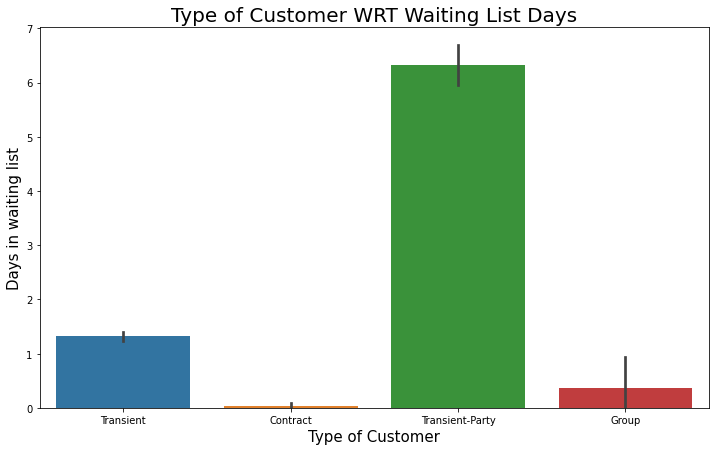

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot( y="days_in_waiting_list", x="customer_type", data=df)
plt.title("Type of Customer WRT Waiting List Days",fontsize=20)
plt.xlabel("Type of Customer",fontsize=15)
plt.ylabel("Days in waiting list",fontsize=15)

Conclusion - Waitings Days are upto 6-7 for Transient-party type customers. 1-2 for transient type and 0-1 for group type.

# 5.2 Waiting Days - WRT Deposit Type

In [ ]:
waiting_deposittype_relation = df.groupby(["days_in_waiting_list"])["deposit_type"].value_counts()
waiting_deposittype_relation

days_in_waiting_list  deposit_type
0                     No Deposit      102974
                      Non Refund       12567
                      Refundable         151
1                     No Deposit          12
2                     No Deposit           4
                                       ...  
236                   No Deposit          35
259                   No Deposit          10
330                   No Deposit          15
379                   No Deposit          15
391                   Non Refund          45
Name: deposit_type, Length: 184, dtype: int64

Text(0, 0.5, 'Days in waiting list')

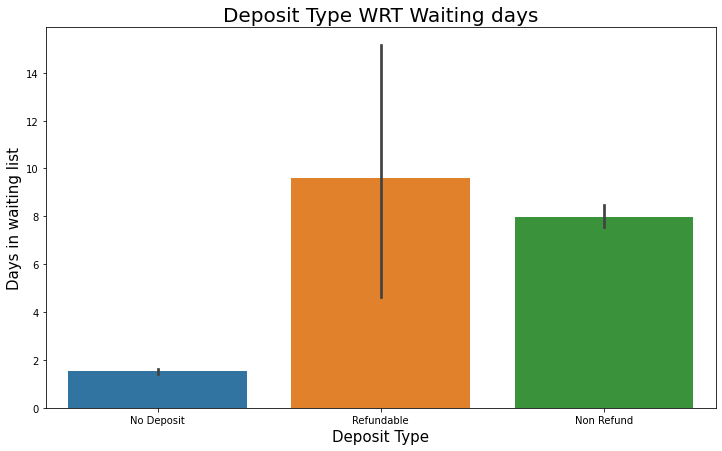

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x = "deposit_type", y="days_in_waiting_list", data=df)
plt.title("Deposit Type WRT Waiting days",fontsize=20)
plt.xlabel("Deposit Type",fontsize=15)
plt.ylabel("Days in waiting list",fontsize=15)

Conclusion - Refundable deposits has waiting days upto 8-10 , for Non-refund 6-8 and for non deposit it is 0-2.

# 5.3 Waiting Days - WRT Market Segments

In [ ]:
waiting_marketsegment_relation = df.groupby(["days_in_waiting_list"])["market_segment"].value_counts()
waiting_marketsegment_relation

days_in_waiting_list  market_segment
0                     Online TA         56474
                      Offline TA/TO     22142
                      Groups            18253
                      Direct            12592
                      Corporate          5251
                                        ...  
236                   Groups               35
259                   Groups               10
330                   Groups               15
379                   Groups               15
391                   Groups               45
Name: market_segment, Length: 203, dtype: int64

Text(0, 0.5, 'Days in waiting list')

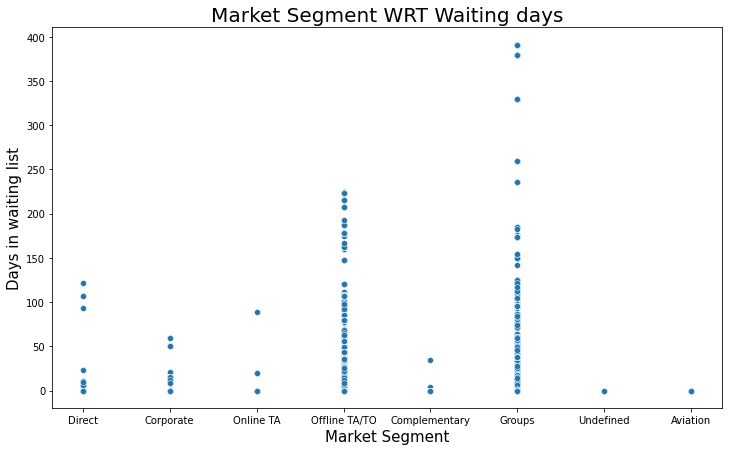

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(x = "market_segment", y="days_in_waiting_list", data=df)
plt.title("Market Segment WRT Waiting days",fontsize=20)
plt.xlabel("Market Segment",fontsize=15)
plt.ylabel("Days in waiting list",fontsize=15)

Conclusion - For Groups type market segment has upto 400 waiting days and for Offline TA/TO has upto 200-250 waiting days. 

# 5.4 Waiting Days - WRT Distribution Channels

In [ ]:
waiting_distributionchannel_relation = df.groupby(["days_in_waiting_list"])["distribution_channel"].value_counts()
waiting_distributionchannel_relation

days_in_waiting_list  distribution_channel
0                     TA/TO                   94336
                      Direct                  14530
                      Corporate                6628
                      GDS                       193
                      Undefined                   5
                                              ...  
236                   TA/TO                      35
259                   TA/TO                      10
330                   TA/TO                      15
379                   TA/TO                      15
391                   TA/TO                      45
Name: distribution_channel, Length: 165, dtype: int64

Text(0, 0.5, 'Days in waiting list')

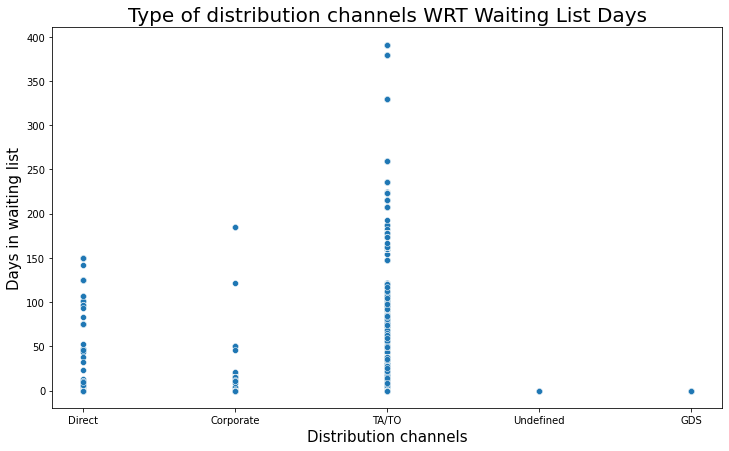

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot( y="days_in_waiting_list", x="distribution_channel", data=df)
plt.title("Type of distribution channels WRT Waiting List Days",fontsize=20)
plt.xlabel("Distribution channels",fontsize=15)
plt.ylabel("Days in waiting list",fontsize=15)


Conclusion - For TA/TO type distribution channels has upto 350-400 waiting days.

# **6. Waiting Days - Impact on Cancellation, Cancellation WRT Customer Type, Cancellation WRT Deposit Type**

# 6.1 Waiting Days Impact on Cancellation

In [ ]:
waiting_cancellation_relation = df.groupby(["days_in_waiting_list"])["is_canceled"].value_counts()
waiting_cancellation_relation

days_in_waiting_list  is_canceled
0                     0              73827
                      1              41865
1                     0                  9
                      1                  3
2                     0                  4
                                     ...  
330                   0                 14
                      1                  1
379                   1                  9
                      0                  6
391                   1                 45
Name: is_canceled, Length: 203, dtype: int64

Text(0.5, 0, 'Days in Waiting')

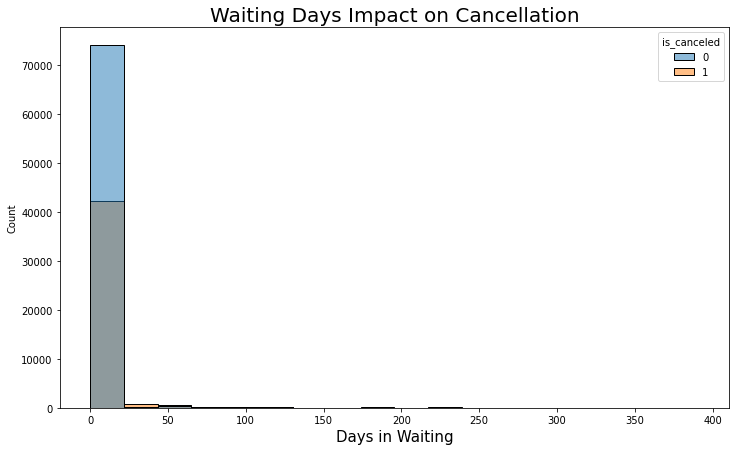

In [ ]:
plt.figure(figsize=(12,7))
sns.histplot( x="days_in_waiting_list", hue="is_canceled", data=df)
plt.title("Waiting Days Impact on Cancellation",fontsize=20)
plt.xlabel("Days in Waiting",fontsize=15)

Conclusion - Waiting Days has a least impact on cacellation. Mostly customers cancelled even with very few waiting days. But few bookings were also cancelled with large waiting days also.

# 6.2 Waiting Days - Cancellation WRT Customer Type

Text(0, 0.5, 'Days in waiting list')

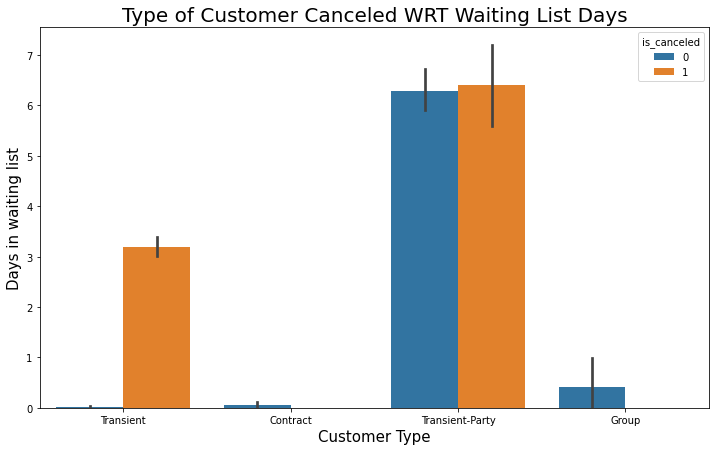

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x = "customer_type", y="days_in_waiting_list", hue="is_canceled", data=df)
plt.title("Type of Customer Canceled WRT Waiting List Days",fontsize=20)
plt.xlabel("Customer Type",fontsize=15)
plt.ylabel("Days in waiting list",fontsize=15)

Conclusion - Transient-party type customers cancellations and non-cancellations were nearly equal with upto 6-7 waiting days. Transient type customers cancelled the booking even with 3-4 waiting days.

# 6.3 Waiting Days - Cancellation WRT Deposit Type

Text(0, 0.5, 'Days in waiting list')

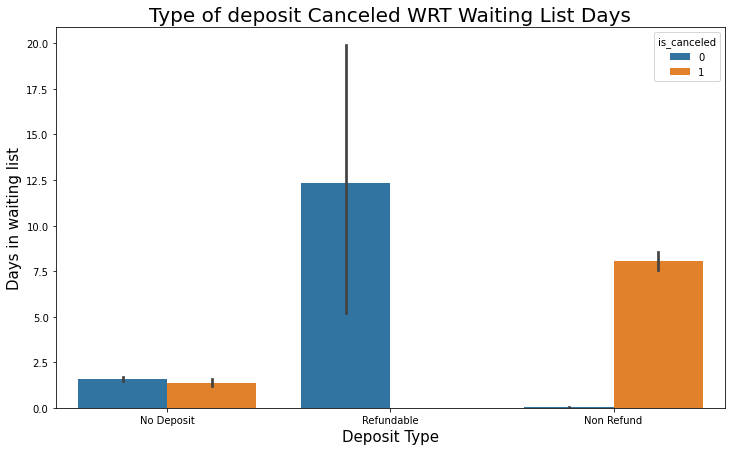

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x = "deposit_type", y="days_in_waiting_list", hue="is_canceled", data=df)
plt.title("Type of deposit Canceled WRT Waiting List Days",fontsize=20)
plt.xlabel("Deposit Type",fontsize=15)
plt.ylabel("Days in waiting list",fontsize=15)

Conclusion - No deposit type cancellations and non cancellations are nearly equal with 0-3 waiting days. For Refundable there are more noncancellation even at the waiting days of 10-13 . For Non refund there are more cancellations for waiting days upto 7-10.

# **7. Correlation and Heat Map**

In [ ]:
corelating_df = df[['is_canceled','lead_time','stays_in_weekend_nights','stays_in_week_nights','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled',
                    'booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']]
corelating_df.corr()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.292876,-0.001323,0.025542,-0.083745,0.110139,-0.057365,-0.144832,0.054301,0.046492,-0.195701,-0.234877
lead_time,0.292876,1.000000,0.085985,0.166892,-0.123209,0.086025,-0.073599,0.002230,0.170008,-0.065018,-0.116624,-0.095949
stays_in_weekend_nights,-0.001323,0.085985,1.000000,0.494175,-0.086009,-0.012769,-0.042859,0.050191,-0.054399,0.050670,-0.018520,0.073124
stays_in_week_nights,0.025542,0.166892,0.494175,1.000000,-0.095302,-0.013976,-0.048873,0.080018,-0.002026,0.066847,-0.024933,0.068738
is_repeated_guest,-0.083745,-0.123209,-0.086009,-0.095302,1.000000,0.082740,0.420642,0.013044,-0.022057,-0.130807,0.077928,0.012963
previous_cancellations,0.110139,0.086025,-0.012769,-0.013976,0.082740,1.000000,0.152570,-0.027261,0.005941,-0.065974,-0.018540,-0.048488
previous_bookings_not_canceled,-0.057365,-0.073599,-0.042859,-0.048873,0.420642,0.152570,1.000000,0.011963,-0.009416,-0.072335,0.047506,0.037775
booking_changes,-0.144832,0.002230,0.050191,0.080018,0.013044,-0.027261,0.011963,1.000000,-0.011916,0.026601,0.067490,0.055003
days_in_waiting_list,0.054301,0.170008,-0.054399,-0.002026,-0.022057,0.005941,-0.009416,-0.011916,1.000000,-0.040859,-0.030601,-0.082755
adr,0.046492,-0.065018,0.050670,0.066847,-0.130807,-0.065974,-0.072335,0.026601,-0.040859,1.000000,0.056510,0.172308


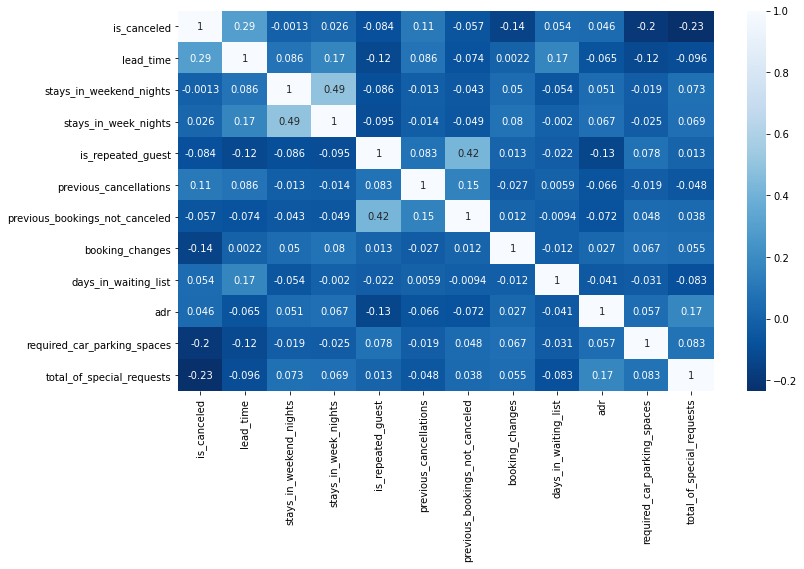

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(corelating_df.corr(),cmap="Blues_r",annot=True)